# ENEXIS Graduation Project

#### Create a model predicting the 'opwek' based on demographical data

### Collect Initial Data

In [17]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Get the data

In [18]:
combined_dataset_name = 'combined_CBS_dataset_84583.csv'
df = pd.read_csv(filepath_or_buffer = combined_dataset_name,
                         sep                = ',',
                         decimal            = ',',
                         thousands          = '.',
                         encoding           = 'unicode_escape')                                   # 1

## Models
### Linear model Y=opgesteld vermogen, X=Aantal huishoudens

In [19]:


train_set, test_set = train_test_split(df, test_size=0.2)
print(f"training set: {len(train_set)}\n    test set: {len(test_set)}")

y_column = 'Opgesteld_vermogen'
columns_to_keep = ['HuishoudensTotaal_28']
# HuishoudensTotaal_28
colomns_to_drop = ['Opgesteld_vermogen','Netbeheerder','Provincie','CBS_Buurt', 'Gemeente', 'WijkenEnBuurten']

Y_train_set = train_set[y_column]
X_train_set = train_set.drop(colomns_to_drop, axis=1).copy()
# X_train_set = train_set[columns_to_keep]
Y_test_set = train_set[y_column]
X_test_set = train_set.drop(colomns_to_drop, axis=1).copy()
# X_test_set = train_set[columns_to_keep]


training set: 380
    test set: 95


In [20]:
X_test_set.head()

,Peildatum,CBS_Buurtcode,Aantal_aansluitingen_in_CBS-buurt,Aantal_aansluitingen_met_opwekinstallatie,HuishoudensTotaal_28
373,2020070,173112000,2840,690,335
38,2020070,168021090,1060,260,45
361,2020070,173107000,12480,5200,1245
101,2020070,10608040,5170,690,490
7,2020070,168004000,720,160,90


In [21]:


lin_reg = LinearRegression()
lin_reg.fit(X_train_set, Y_train_set)

LinearRegression()

#### Check the quality of the model

Coefficients: 
 [ 0.00000000e+00  2.50099907e-06  6.88429888e-01  3.02159601e+00
 -5.92417011e+00]
Mean squared error: 1511606.37
Coefficient of determination: 0.96


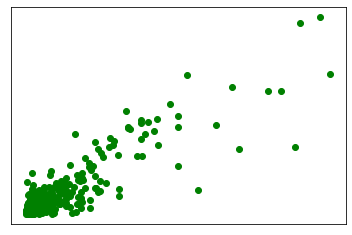

In [22]:
# Make predictions using the testing set
y_pred = lin_reg.predict(X_test_set)

# The coefficients
print("Coefficients: \n", lin_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test_set, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test_set, y_pred))

#fix the fact that x and y are not the same dimensions
# x_s_huishoudens_totaal = X_test_set['HuishoudensTotaal_28']
x_s_huishoudens_totaal = X_test_set['HuishoudensTotaal_28']
# Plot outputs
# plt.scatter(x_s_huishoudens_totaal, Y_test_set, color="green")
plt.scatter(x_s_huishoudens_totaal, Y_test_set, color="green")

plt.xlabel = 'Huishoudens total (#)'
plt.xticks(())
plt.ylabel = 'Opgesteld vermogen (wP)'
plt.yticks(())

plt.show()

# plt.ylim(0, 12)